In [2]:
import sys
import tensorflow as tf
sys.path.append('../utils/')
import numpy as np

from synthetic import create_mnist_generator, Options

np.random.seed(1000)
tf.executing_eagerly()

True

In [3]:
opts = Options(
    image_size=100, 
    digit_size=28, 
    num_channels=5, 
    seq_len=12, 
    step_size=0.5
    )
generator = create_mnist_generator(opts)

data_loader = tf.data.Dataset.from_generator(
    generator,
    output_types=(tf.float32, tf.float32)
)

images, ghi = next(iter(data_loader))

print(images.shape)

(5, 12, 100, 100)


In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

get_ipython().magic(u'matplotlib inline')

def show_animation(opts, images, channel=None):
    name = 'animation-all.gif'

    if not channel and channel != 0:
        seq = np.sum(images.numpy(), axis=0)
    else:
        name = 'animation-channel-%d.gif' % (channel)
        seq = images.numpy()[channel]
        

    fig = plt.figure()
    img = plt.imshow(seq[0], interpolation='none', aspect='auto')

    def update(i):
        img.set_array(seq[i])

        return [img]

    anim = FuncAnimation(
        fig, 
        update, 
        frames=np.arange(1, 10), 
        interval=20, blit=True
    )
    
    rc('animation', html='html5')
    anim.save('../images/'+ name, writer='imagemagick', fps=5)
    Image(url='../images/'+ name)

**Channel 0 animation**
---

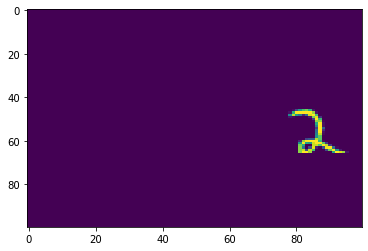

In [5]:
show_animation(opts, images, 0)

**Channel 2 Animation**
---

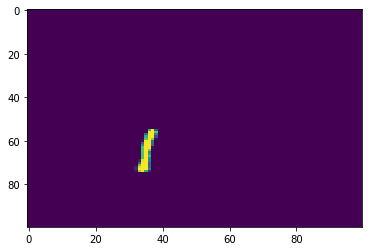

In [6]:
show_animation(opts, images, 1)

**All channels Animation**
---

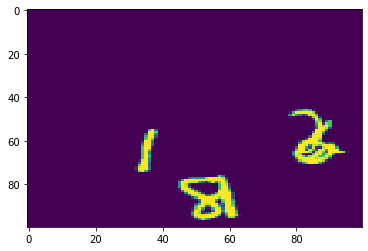

In [7]:
show_animation(opts, images)